# Assignment 18_Forecasting_Airplanes

In [7]:
import pandas as pd

In [8]:
df=pd.read_excel('C:\\Users\\Raghavendra\\OneDrive\\Desktop\\assignment\Airlines+Data.xlsx')

In [9]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [10]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [11]:
import matplotlib.pyplot as plt

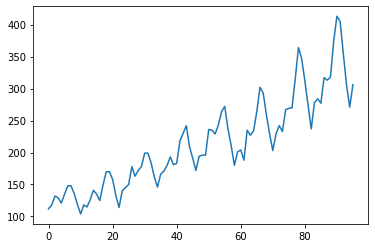

In [12]:
plt.plot(df.iloc[:,1])

## Scaling

#### LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
df.iloc[:,1]

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [16]:
df.shape

(96, 1)

In [17]:
df

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [18]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [19]:
training_size

62

In [20]:
test_size=len(df)-training_size

In [21]:
test_size

34

In [22]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [23]:
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [24]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [25]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
X_train.shape, y_train.shape

((57, 4), (57,))

In [28]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [29]:
X_train.shape

(57, 4, 1)

In [35]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
57/57 [==============================] - 7s 40ms/step - loss: 0.0206 - val_loss: 0.0717
Epoch 2/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0109 - val_loss: 0.0765
Epoch 3/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0087 - val_loss: 0.0407
Epoch 4/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0090 - val_loss: 0.0435
Epoch 5/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0084 - val_loss: 0.0399
Epoch 6/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0076 - val_loss: 0.0537
Epoch 7/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0084 - val_loss: 0.0280
Epoch 8/100
57/57 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0483
Epoch 9/100
57/57 [==============================] - 0s 9ms/step - loss: 0.0066 - val_loss: 0.0384
Epoch 10/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0075 - val_loss: 0.0320
Epo

Epoch 83/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0033 - val_loss: 0.0139
Epoch 84/100
57/57 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0131
Epoch 85/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0031 - val_loss: 0.0091
Epoch 86/100
57/57 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0097
Epoch 87/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0029 - val_loss: 0.0122
Epoch 88/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0028 - val_loss: 0.0152
Epoch 89/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0029 - val_loss: 0.0131
Epoch 90/100
57/57 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0131
Epoch 91/100
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0126
Epoch 92/100
57/57 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0099


In [45]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 41ms/step


In [38]:
test_predict

array([[0.55388874],
       [0.6573917 ],
       [0.5299735 ],
       [0.40715542],
       [0.3921086 ],
       [0.34833863],
       [0.46914127],
       [0.478364  ],
       [0.392602  ],
       [0.5548664 ],
       [0.5245366 ],
       [0.49657178],
       [0.7090261 ],
       [0.83759534],
       [0.6081889 ],
       [0.5124398 ],
       [0.50465477],
       [0.43340176],
       [0.6440703 ],
       [0.59532905],
       [0.49275815],
       [0.70351577],
       [0.6209564 ],
       [0.61075026],
       [0.8834142 ],
       [0.9179997 ],
       [0.7323574 ],
       [0.58335793],
       [0.56062114]], dtype=float32)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
test_predict

array([[275.15164],
       [307.13406],
       [267.7618 ],
       [229.81102],
       [225.16156],
       [211.63664],
       [248.96466],
       [251.81448],
       [225.31401],
       [275.4537 ],
       [266.08182],
       [257.44067],
       [323.08905],
       [362.81696],
       [291.9304 ],
       [262.3439 ],
       [259.93832],
       [237.92116],
       [303.01773],
       [287.9567 ],
       [256.26227],
       [321.38635],
       [295.87555],
       [292.72183],
       [376.975  ],
       [387.66193],
       [330.29843],
       [284.2576 ],
       [277.23193]], dtype=float32)

In [41]:
y_train.shape,train_predict.shape,train_predict

((57,),
 (57, 1),
 array([[136.05388],
        [129.54703],
        [146.36783],
        [157.26581],
        [154.53853],
        [143.23091],
        [129.51161],
        [117.22145],
        [130.96391],
        [123.63641],
        [134.79521],
        [149.82841],
        [141.2921 ],
        [133.57768],
        [161.64664],
        [179.67213],
        [174.01918],
        [162.62582],
        [141.34564],
        [127.82242],
        [155.47552],
        [153.40703],
        [156.85963],
        [189.18715],
        [165.76466],
        [180.36336],
        [188.49115],
        [208.80513],
        [202.87383],
        [184.47029],
        [168.03   ],
        [158.06432],
        [182.17294],
        [180.33394],
        [186.95184],
        [201.62466],
        [183.4558 ],
        [190.54544],
        [233.77162],
        [234.60646],
        [240.53201],
        [198.25179],
        [193.70903],
        [184.04762],
        [210.60577],
        [204.35516],
        [199.273

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

185.08043890262118

In [43]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

185.08043890262118

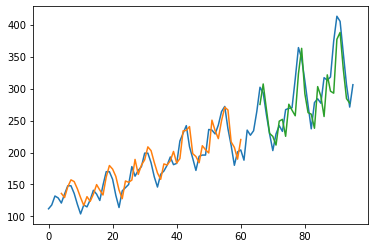

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()